In [1]:
#math and linear algebra stuff
import numpy as np

#Math and linear algebra stuff
import scipy.stats as scs

#plots
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15.0, 15.0)
#mpl.rc('text', usetex = True)
import matplotlib.pyplot as plt
%matplotlib inline

# Registration and procrustean problem



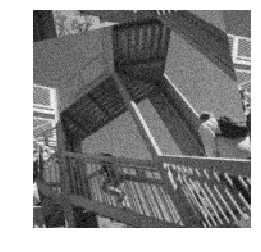

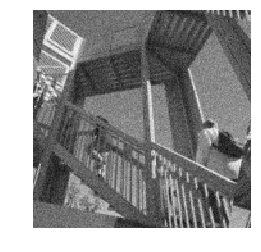

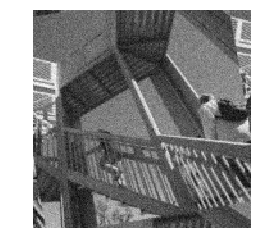

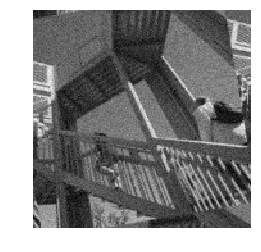

In [3]:
def GetRotMat( theta ):
    return np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])

#Example of image super resolution using mutual coherence, first let's take an image
import scipy
from scipy import misc
xsharp = scipy.misc.face()

#Now, generate n (rotated and shifted and subsampled) + noisy versions
n=4
#In our case, there are 3 wavelenght: R, G and B
stack=[[],[],[]]
for i in range(n):
    newIm=np.zeros_like(xsharp)
    #Generate random rotation matrix between -15 and +15 degrees
    rtheta = np.random.uniform(-15,15)*((2*np.pi)/360)
    Mrot = GetRotMat(rtheta)
    #Generate random translation vector, between -5% and +5% of the original size
    maxShift=0.05*np.max(np.array(xsharp.shape))
    shift = np.random.uniform(-maxShift,maxShift,(2))
    
    #Now perform rotation/shift
    center=np.array(newIm.shape)/2
    for x in np.arange(newIm.shape[0]):
        for y in np.arange(newIm.shape[1]):
            pos=np.array([x,y])
            oldIdx=np.dot(Mrot,(pos-center))+center+shift
            oldIdx=(oldIdx%xsharp.shape).astype(int)
            newIm[x,y]=xsharp[oldIdx[0],oldIdx[1]]
    
    #Subsample the image by a factor of 9 (3 times per direction)
    newIm = scipy.misc.imresize(newIm, np.array(xsharp.shape)//3, interp='bilinear')
    
    #Now add a centered gaussian noise of standard deviation equal to 5% of the input image dynamic
    newIm = newIm+np.random.normal(0, scale=newIm.ptp()*0.05,size=newIm.shape)
    newIm = newIm+newIm.min()
    stack.append(newIm)
    
    #Now plot
    plt.figure()
    plt.imshow(newIm, interpolation='nearest', cmap=plt.cm.gray)
    plt.axis("off")

## Orthogonal procrustes problem and Kabsch algorithm

Sources for this article are [wikipedia here](https://en.wikipedia.org/wiki/Kabsch_algorithm) and [there](https://en.wikipedia.org/wiki/Orthogonal_Procrustes_problem)
